# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------1")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build query URL
    url = "https://api.openweathermap.org/data/2.5/weather?"
    
    place = f"q={city}&"
    apik = f"appid={weather_api_key}&"
    unit = f"units=imperial"

    city_url = url+place+apik+unit

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------2")
print("Data Retrieval Complete      ")
print("-----------------------------3")


Beginning Data Retrieval     
-----------------------------1
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | cambria
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | port glaud
City not found. Skipping...
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | changli
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | upington
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | petropavlovsk-kamchats

Processing Record 37 of Set 4 | ust-nera
Processing Record 38 of Set 4 | prince rupert
Processing Record 39 of Set 4 | atherton
Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | klyuchi
Processing Record 42 of Set 4 | badger
Processing Record 43 of Set 4 | nzerekore
Processing Record 44 of Set 4 | port mathurin
Processing Record 45 of Set 4 | ouddorp
Processing Record 46 of Set 4 | portales
Processing Record 47 of Set 4 | awjilah
Processing Record 48 of Set 4 | argo
Processing Record 49 of Set 4 | globe
City not found. Skipping...
Processing Record 0 of Set 5 | fort bragg
Processing Record 1 of Set 5 | puerto francisco de orellana
Processing Record 2 of Set 5 | itoman
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | debila
Processing Record 5 of Set 5 | nagqu
Processing Record 6 of Set 5 | quellon
Processing Record 7 of Set 5 | windhoek
Processing Record 8 of Set 5 | harper
Processing Record 9 of Set 5 | ciudad lazaro carden

Processing Record 28 of Set 8 | humberto de campos
Processing Record 29 of Set 8 | energetik
Processing Record 30 of Set 8 | merizo village
Processing Record 31 of Set 8 | hangu
Processing Record 32 of Set 8 | jayapura
Processing Record 33 of Set 8 | pemangkat
Processing Record 34 of Set 8 | yamethin
Processing Record 35 of Set 8 | ad dabbah
Processing Record 36 of Set 8 | narasannapeta
Processing Record 37 of Set 8 | baker city
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | fagersta
Processing Record 40 of Set 8 | mersa matruh
Processing Record 41 of Set 8 | hailar
Processing Record 42 of Set 8 | east london
Processing Record 43 of Set 8 | moyobamba
Processing Record 44 of Set 8 | seminole
Processing Record 45 of Set 8 | novaya igirma
Processing Record 46 of Set 8 | undurkhaan
Processing Record 47 of Set 8 | lompoc
Processing Record 48 of Set 8 | riverton
Processing Record 49 of Set 8 | huangshan
Processing Record 0 of Set 9 | nemuro
Processing Record 

Processing Record 19 of Set 12 | mpanda
Processing Record 20 of Set 12 | davlekanovo
Processing Record 21 of Set 12 | nguigmi
Processing Record 22 of Set 12 | hadibu
Processing Record 23 of Set 12 | tejen
Processing Record 24 of Set 12 | ambodifotatra
Processing Record 25 of Set 12 | rudnya
Processing Record 26 of Set 12 | baardheere
Processing Record 27 of Set 12 | pimenta bueno
Processing Record 28 of Set 12 | midvagur
Processing Record 29 of Set 12 | great bend
Processing Record 30 of Set 12 | viedma
Processing Record 31 of Set 12 | nar'yan-mar
Processing Record 32 of Set 12 | berberati
Processing Record 33 of Set 12 | metu
Processing Record 34 of Set 12 | salahonda
Processing Record 35 of Set 12 | kiruna
Processing Record 36 of Set 12 | dalbandin
Processing Record 37 of Set 12 | port saint john's
Processing Record 38 of Set 12 | longjiang
Processing Record 39 of Set 12 | manfalut
Processing Record 40 of Set 12 | lieksa
Processing Record 41 of Set 12 | selfoss
Processing Record 42 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.03,65,60,38.34,TF,1685998842
1,udachny,66.4167,112.4000,32.45,92,90,15.19,RU,1685998842
2,cambria,35.5641,-121.0808,65.14,83,100,5.19,US,1685998811
3,puerto natales,-51.7236,-72.4875,34.84,88,19,4.52,CL,1685998602
4,namibe,-15.1961,12.1522,66.15,80,5,15.03,AO,1685998842


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.03,65,60,38.34,TF,1685998842
1,udachny,66.4167,112.4000,32.45,92,90,15.19,RU,1685998842
2,cambria,35.5641,-121.0808,65.14,83,100,5.19,US,1685998811
3,puerto natales,-51.7236,-72.4875,34.84,88,19,4.52,CL,1685998602
4,namibe,-15.1961,12.1522,66.15,80,5,15.03,AO,1685998842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

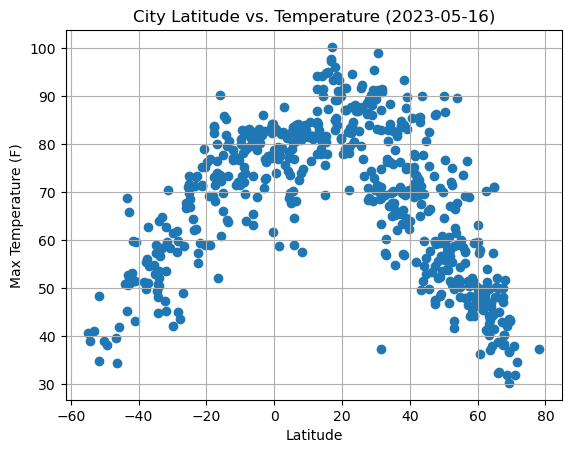

In [8]:
# Graph features
plt.title('City Latitude vs. Temperature (2023-05-16)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Plot graph
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

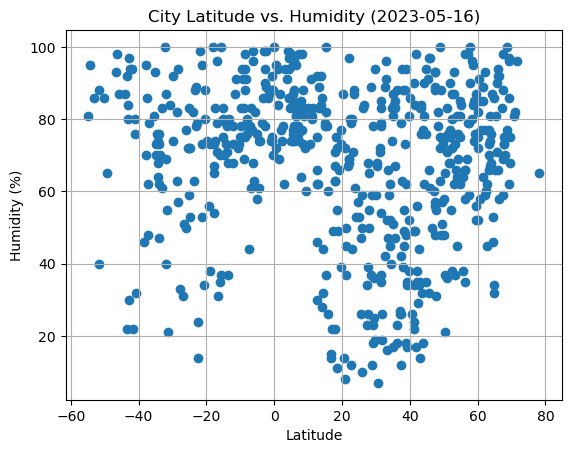

In [9]:
# Graph features
plt.title('City Latitude vs. Humidity (2023-05-16)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Plot graph
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

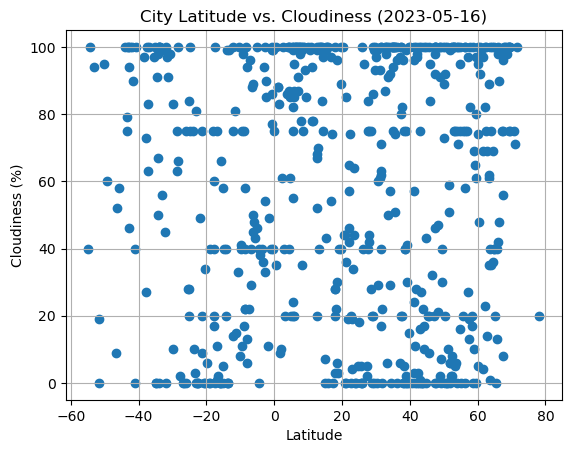

In [10]:
# Graph features
plt.title('City Latitude vs. Cloudiness (2023-05-16)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Plot graph
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

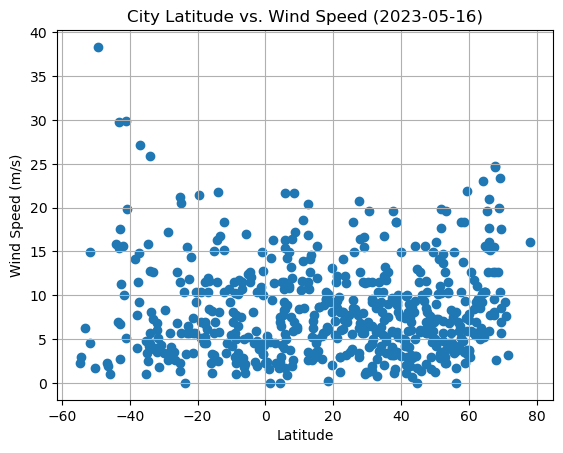

In [11]:
# Graph features
plt.title('City Latitude vs. Wind Speed (2023-05-16)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Plot graph
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define Function
def f(df,x_values,y_values,xpos,ypos):
    x = df[x_values]
    y = df[y_values]
    
    plt.scatter(x,y)
    
    (m, b, r, p, s) = linregress(x, y)
    regress_values = x * m + b
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(xpos,ypos),fontsize=15,color="red")
    
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    
    print(f"The r-squared is: {r**2}")
    
    plt.show()

In [13]:
city_data_labeled = city_data_df.rename(columns = {
    'Max Temp':'Max Temperature (°F)',
    'Lat':'Latitude',
    'Lng':'Longitude',
    'Humidity':'Humidity (%)',
    'Cloudiness':'Cloudiness (%)',
    'Wind Speed':'Wind Speed (m/s)'
})

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_labeled[city_data_df['Lat'] >= 0]

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_labeled[city_data_df['Lat'] < 0]

In [14]:
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,udachny,66.4167,112.4000,32.45,92,90,15.19,RU,1685998842
2,cambria,35.5641,-121.0808,65.14,83,100,5.19,US,1685998811
5,isafjordur,66.0755,-23.1240,38.68,92,100,5.88,IS,1685998843
7,changli,39.7042,119.1506,70.00,38,15,7.67,CN,1685998843
8,anadyr,64.7500,177.4833,41.50,86,100,15.66,RU,1685998843


In [15]:
# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.03,65,60,38.34,TF,1685998842
3,puerto natales,-51.7236,-72.4875,34.84,88,19,4.52,CL,1685998602
4,namibe,-15.1961,12.1522,66.15,80,5,15.03,AO,1685998842
6,saint-philippe,-21.3585,55.7679,71.19,95,75,7.43,RE,1685998843
11,grytviken,-54.2811,-36.5092,39.06,95,100,2.91,GS,1685998844


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.564784378988404


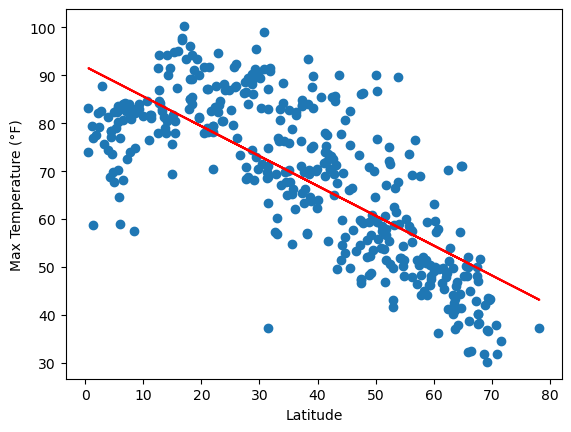

In [16]:
# Linear regression on Northern Hemisphere
f(northern_hemi_df,'Latitude','Max Temperature (°F)',10,20)

The r-squared is: 0.6946502647577449


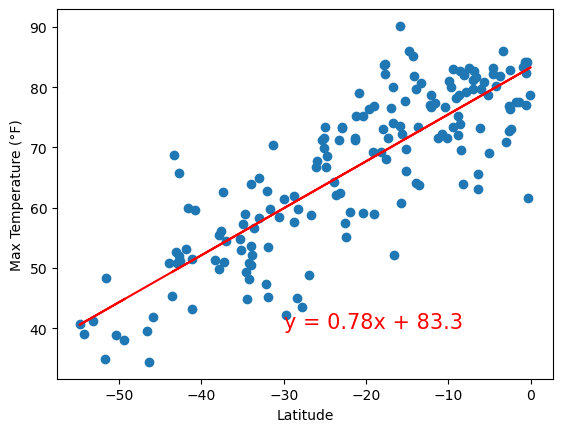

In [17]:
# Linear regression on Southern Hemisphere
f(southern_hemi_df,'Latitude','Max Temperature (°F)',-30,40)

**Discussion about the linear relationship:**
As the magnitude of latitude increases, this represents cities that are further from the equator (further from latitude 0), and closer to the poles. As the magnitude of latitude increases, this association suggests that max temperatures increase as well. The r-squared value of this association is ~0.65, suggesting it is a moderately strong association.

This makes sense because equator is the part of the earth that is 1) closest to the sun, 2) gets the most hours of sunlight, 3) gets the most direct sunlight. This access to direct sunlight is increases regional temperatures. The effect of this is mitigated by many other, smaller scale geographic conditions as well as global wind patterns. As such, this weakens the apparent association between temperature and latitude, leading to variance among max temperatures.

Based on the scatterplot, it would seem that the association is stronger at lower latitueds (-60 to -30 degrees). However, we can also see that there are significantly fewer datapoints in that interval. This is due to the fact that our city latitudes were chosen uniformly randomly along the full range of latitudes (-90 to 90), but cities are *not* geographically distributed uniformly along the latitudes due to extreme environmental conditions as well as the geometric properties of spheres (the area enclosed by the top 1/4th of earth latitudes is approximately 1/7th of the total earth surface area).

In order to control for this last factor, I would recommend we consider a stratified random sample of cities along latitude, selecting randomly uniformly from cities in different latitudes, so that the number of cities analyzed is comprable over comparable intervals of latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 9.904661824744848e-05


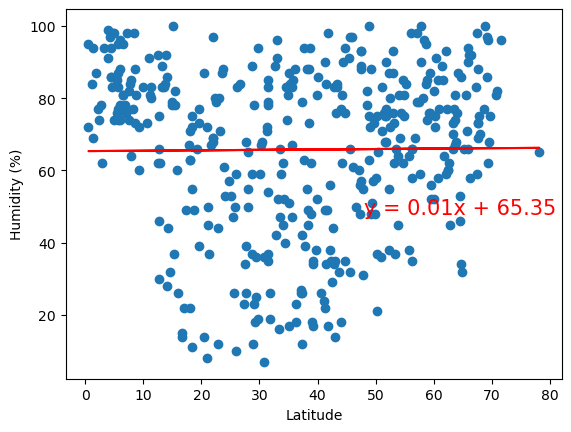

In [18]:
# Northern Hemisphere
f(northern_hemi_df,'Latitude','Humidity (%)',48,48)

The r-squared is: 0.02236770165114641


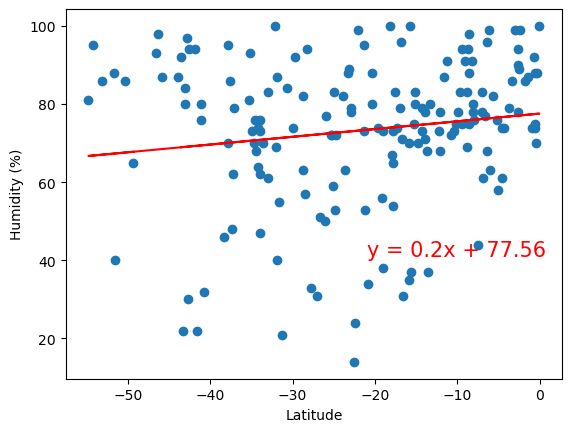

In [19]:
# Southern Hemisphere
f(southern_hemi_df,'Latitude','Humidity (%)',-21,41)

**Discussion about the linear relationship:**
As the magnitude of latitude increases, this association suggests that there is little to no impact on humidity. The r-squared value of this association is 0.002 in the northern hemisphere and ~0.07 in the southern hemisphere, suggesting it is a weak association.

The scatter plot would suggest, however, that there is some 'clustering' around the equator (latitude = 0). This suggests that equatorial weather conditions could disproportionately lead to humid conditions.

I would suggest considering a non-linear regression to better capture this association. Additionally, a stratified random sample of cities along latitude could enrich this analysis.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004270079677457111


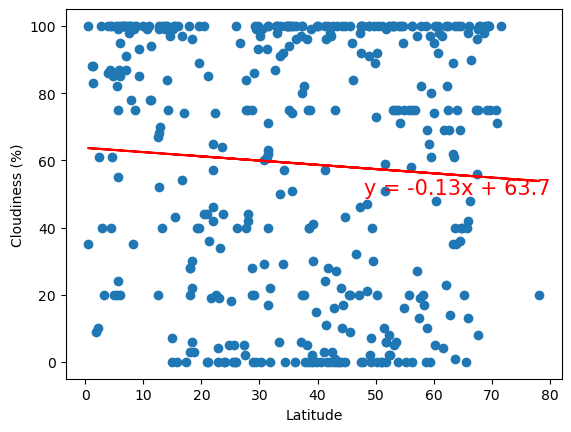

In [20]:
# Northern Hemisphere
f(northern_hemi_df,'Latitude','Cloudiness (%)',48,50)

The r-squared is: 0.024328468410213737


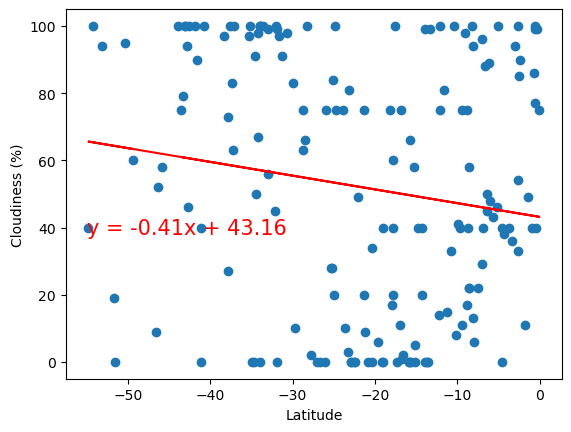

In [21]:
# Southern Hemisphere
f(southern_hemi_df,'Latitude','Cloudiness (%)',-55,38)

**Discussion about the linear relationship:**
As the magnitude of latitude increases, this association suggests that there is little to no impact on cloudiness. The r-squared value of this association is 0.01 in the northern hemisphere and 0.002 in the southern hemisphere, suggesting it is a weak association.

This is a great example of an association where linearity doesn't meaningfully capture interesting relationships between the two variables. Instead, it could be interesting to analyze the clusters. Consider the visible group close to 0% cloudiness, between -40 and -20 degrees latitude. I'd love to see these points plotted and identified on a map, to see if we can learn something about where in the world we see patterns of weather like these clusters.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008040401454634302


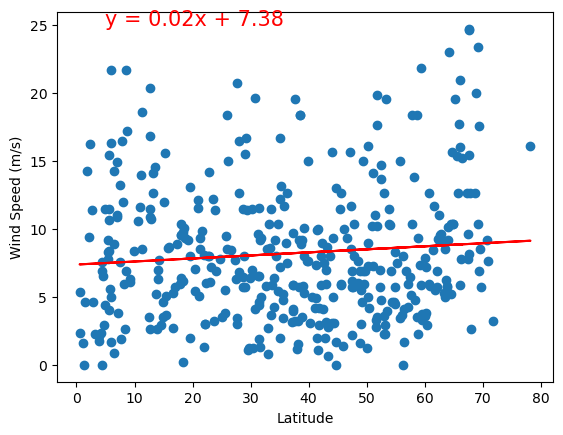

In [22]:
# Northern Hemisphere
f(northern_hemi_df,'Latitude','Wind Speed (m/s)',5,25)

The r-squared is: 0.025298432702575258


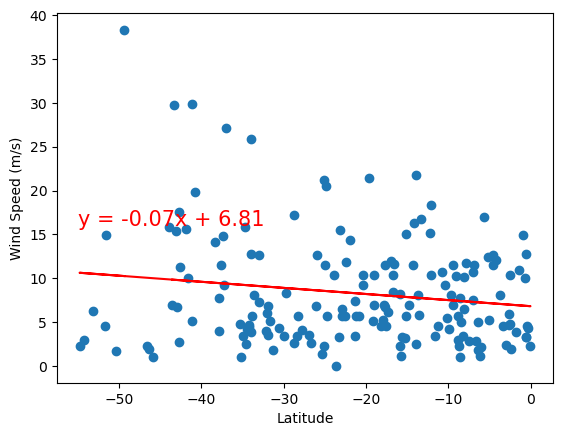

In [23]:
# Southern Hemisphere
f(southern_hemi_df,'Latitude','Wind Speed (m/s)',-55,16)

**Discussion about the linear relationship:**
As the magnitude of latitude increases, this association suggests that there is little to no impact on windiness. The r-squared value of this association is 0.004 in the northern hemisphere and 0.08 in the southern hemisphere, suggesting it is a negligible association.

This association is very slightly negative, indicated by the negative slope of the linear regression. However, on the scatterplot we can see that there is a cluster of four points around -48 latitude, 30-35 windspeed that seem to be outliers. I would want to determine, quantitatively or qualitatively, if these are indeed outliers, or perhaps a randomly small subset of what could be a significant cluster of geographic locations with a unique weather pattern.